# Imports,  Settings and Paths

In [1]:
comment = 'batchnorm_big'

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import torch
import torch.utils.data as data_utils

In [3]:
from Code.Models.DeepPotential.deep_potential import DeepPotential
from Code.Train.trainer import Trainer
from Code.Tools.Network.lr_scheduler import AbcExponentialLR

In [4]:
data_path_train = './Dataset/DeepPotential/reference_X.npy'
label_path_train = './Dataset/DeepPotential/reference_Y.npy'
data_path_within = './Dataset/DeepPotential/within_X.npy'
label_path_within = './Dataset/DeepPotential/within_Y.npy'
eval_path = './evaluation/c7o2h10'

In [5]:
debug = False
use_cuda = torch.cuda.is_available()
print('use cuda:  ', use_cuda)

use cuda:   True


# Read the Data

In [6]:
X_train = np.load(data_path_train)
Y_train = np.load(label_path_train) * -1
X_within = np.load(data_path_within)
Y_within = np.load(label_path_within) * -1

In [7]:
print(X_train.shape, X_within.shape)

(404000, 19, 72) (101000, 19, 72)


In [8]:
if debug:
    n_data = 4000
    X_train = X_train[:n_data]
    Y_train = Y_train[:n_data]
    X_within = X_within[:n_data]
    Y_within = Y_within[:n_data]

# Train Model

## Instanciate and create Dataloaders

In [9]:
optimizer = torch.optim.Adam
loss_fn = torch.nn.MSELoss
lr_scheduler = AbcExponentialLR
lr_schedule = (0.01, 0.96, 1.5)
deep_pot = DeepPotential()
trainer = Trainer(model=deep_pot, optimizer=optimizer, loss_fn=loss_fn, eval_path=eval_path,
                  comment=comment, lr_scheduler=lr_scheduler, abc_schedule=lr_schedule,
                  use_cuda=use_cuda, single_test_batch=True, momentum_scheme=True)

In [10]:
trainer.create_dataloaders(X_train, Y_train, X_within, Y_within, 128, normalize_X=True, num_workers=2)

## Do the learning

In [11]:
trainer.fit(320)

epoch: 1	progress: 0.0	time estimate: 1038.26	train loss: 0.018812	test loss: 0.076482
epoch: 2	progress: 0.01	time estimate: 989.04	train loss: 0.002028	test loss: 0.006264
epoch: 3	progress: 0.01	time estimate: 968.72	train loss: 0.001884	test loss: 0.171409
epoch: 4	progress: 0.01	time estimate: 957.86	train loss: 0.001556	test loss: 0.175146
epoch: 5	progress: 0.02	time estimate: 950.4	train loss: 0.001372	test loss: 0.181697
epoch: 6	progress: 0.02	time estimate: 943.86	train loss: 0.001259	test loss: 0.18272
epoch: 7	progress: 0.02	time estimate: 938.36	train loss: 0.001128	test loss: 1.8181
epoch: 8	progress: 0.03	time estimate: 933.93	train loss: 0.001045	test loss: 1443.545654
epoch: 9	progress: 0.03	time estimate: 929.6	train loss: 0.000993	test loss: 0.178904
epoch: 10	progress: 0.03	time estimate: 925.45	train loss: 0.000923	test loss: 2653191405568.0
epoch: 11	progress: 0.03	time estimate: 921.72	train loss: 0.00085	test loss: 1167046144.0
epoch: 12	progress: 0.04	time est

epoch: 91	progress: 0.28	time estimate: 678.49	train loss: 0.00027	test loss: 6936410456064.0
epoch: 92	progress: 0.29	time estimate: 675.56	train loss: 0.000269	test loss: 1176669257728.0
epoch: 93	progress: 0.29	time estimate: 672.6	train loss: 0.000268	test loss: 629244493824.0
epoch: 94	progress: 0.29	time estimate: 669.66	train loss: 0.000268	test loss: 53411790848.0
epoch: 95	progress: 0.3	time estimate: 666.69	train loss: 0.000266	test loss: 94.258316
epoch: 96	progress: 0.3	time estimate: 663.74	train loss: 0.000266	test loss: 7.714478694953124e+17
epoch: 97	progress: 0.3	time estimate: 660.76	train loss: 0.000264	test loss: 0.183675
epoch: 98	progress: 0.31	time estimate: 657.8	train loss: 0.000262	test loss: 3.4155637343949894e+20
epoch: 99	progress: 0.31	time estimate: 654.86	train loss: 0.000262	test loss: 51734024.0
epoch: 100	progress: 0.31	time estimate: 651.88	train loss: 0.000261	test loss: 0.180789
epoch: 101	progress: 0.32	time estimate: 648.92	train loss: 0.000258	t

epoch: 179	progress: 0.56	time estimate: 417.77	train loss: 0.000225	test loss: 5.245038800886825e+18
epoch: 180	progress: 0.56	time estimate: 414.8	train loss: 0.000225	test loss: 3.3518230222314196e+20
epoch: 181	progress: 0.57	time estimate: 411.84	train loss: 0.000226	test loss: 0.184888
epoch: 182	progress: 0.57	time estimate: 408.87	train loss: 0.000226	test loss: 0.187239
epoch: 183	progress: 0.57	time estimate: 405.91	train loss: 0.000225	test loss: 104101152.0
epoch: 184	progress: 0.57	time estimate: 402.94	train loss: 0.000226	test loss: 7.796794402624714e+19
epoch: 185	progress: 0.58	time estimate: 399.97	train loss: 0.000224	test loss: 1.8715851743630983e+19
epoch: 186	progress: 0.58	time estimate: 397.0	train loss: 0.000225	test loss: 1.1756980375098082e+21
epoch: 187	progress: 0.58	time estimate: 394.04	train loss: 0.000225	test loss: 0.186365
epoch: 188	progress: 0.59	time estimate: 391.08	train loss: 0.000225	test loss: 0.185166
epoch: 189	progress: 0.59	time estimate: 

Process Process-914:
Process Process-913:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/stfn/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/stfn/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/stfn/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/stfn/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/stfn/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/home/stfn/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/home/stfn/anaconda3/lib/python3.6

KeyboardInterrupt: 

In [12]:
trainer.calculate_mae()

72.2921371459961

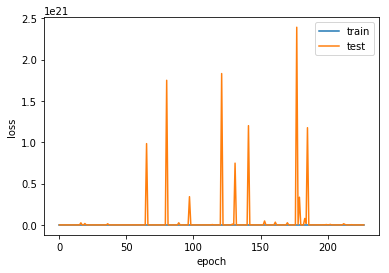

In [13]:
trainer.create_loss_plot()

In [14]:
trainer.save_loss_plot()

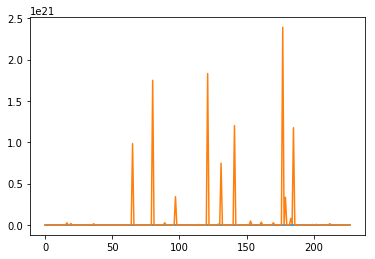

In [21]:
plt.plot(trainer.train_losses)
plt.plot(trainer.test_losses)


In [25]:
def backtransform(Y_normed, Y_min, Y_max):
    return Y_normed * (Y_max - Y_min) + Y_min

In [34]:
def _calculate_mae(loader):
    pred, y = trainer.transform(loader, return_labels=True, in_train_mode=True)
    pred = backtransform(pred, trainer.y_min, trainer.y_max).squeeze()
    y = backtransform(y, trainer.y_min, trainer.y_max).squeeze()
    assert (pred.shape == y.shape)
    return abs(pred - y).mean().numpy().item()

In [39]:
_calculate_mae(trainer.train_loader)

0.0802145004272461

In [40]:
trainer.train_loader.shuffle = False

In [41]:
_calculate_mae(trainer.train_loader)

0.08034589141607285

In [38]:
trainer.test_loader.shuffle

True